# <center> **Kaggle’s Spaceship Titanic Competition**
# <center> **Imputing Missing Values**

# **Libraries**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import functions
import importlib
importlib.reload(functions)

from sklearn.preprocessing import LabelEncoder

import warnings

# **Data Overview and Preprocessing**

In [45]:
data = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\data.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

data = data.drop([target], axis=1)

# **Imputing Missing Values**

In [46]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
HomePlanet,288,2.22
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28


## **Home Planet**

### **Impute Home Planet from Group**

In [47]:
unique_homeplanets_per_group = data.groupby('Group')['HomePlanet'].nunique()
groups_with_multiple_planets = unique_homeplanets_per_group[unique_homeplanets_per_group > 1]

print(groups_with_multiple_planets)

Series([], Name: HomePlanet, dtype: int64)


In [48]:
group_homeplanet_map = data.groupby('Group')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_homeplanet(row):
    if pd.isna(row['HomePlanet']):
        return group_homeplanet_map.get(row['Group'], row['HomePlanet'])
    else:
        return row['HomePlanet']

data['HomePlanet'] = data.apply(fill_missing_homeplanet, axis=1)

In [49]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
HomePlanet,157,1.21
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28


### **Impute Home Planet from Last Name**

In [50]:
lastname_homeplanet_map = data.groupby('LastName')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_homeplanet_by_lastname(row):
    if pd.isna(row['HomePlanet']):
        return lastname_homeplanet_map.get(row['LastName'], row['HomePlanet'])
    else:
        return row['HomePlanet']

data['HomePlanet'] = data.apply(fill_missing_homeplanet_by_lastname, axis=1)

In [51]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
HomePlanet,7,0.05
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28


### **Impute Home Planet from Mode**

In [52]:
homeplanet_mode = data['HomePlanet'].mode()[0]
print(homeplanet_mode)

Earth


In [53]:
mode_value = data['HomePlanet'].mode()

if not mode_value.empty:
    data['HomePlanet'] = data['HomePlanet'].fillna(mode_value[0])

In [54]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28


### **Insights**

>  **1. Grouping by Group:** Starting with 288 missing values. Grouping by 'Group' to find the most common (or only) HomePlanet. Fill missing HomePlanet values based on Group's identified home planet. End with 157 missing values. </BR>
>  **2. Grouping by Last Name:** Starting with 157 missing values. Grouping by 'LastName' to find the most common (or only) HomePlanet. Fill missing HomePlanet values based on last name's identified home planet. End with 7 missing values. </BR>
>  **3. Mode:** Start with 7 missing values. Fill missing values by mode of HomePlanet, which is Earth. End with 0 missing values.

## **Destination**

### **Impute Destination from Group**

In [55]:
unique_destinationplanets_per_group = data.groupby('Group')['Destination'].nunique()
groups_with_multiple_destinations = unique_destinationplanets_per_group[unique_destinationplanets_per_group > 1]

groups_with_multiple_destinations.head()

Group
8     2
17    2
20    3
32    2
44    3
Name: Destination, dtype: int64

In [56]:
group_destinationplanet_map = data.groupby('Group')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_destinationplanet(row):
    if pd.isna(row['Destination']):
        return group_destinationplanet_map.get(row['Group'], row['Destination'])
    else:
        return row['Destination']

data['Destination'] = data.apply(fill_missing_destinationplanet, axis=1)

In [57]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,154,1.19
VIP,296,2.28


### **Impute Destination from Last Name**

In [58]:
lastname_destinationplanet_map = data.groupby('LastName')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_destinationplanet_by_lastname(row):
    if pd.isna(row['Destination']):
        return lastname_destinationplanet_map.get(row['LastName'], row['Destination'])
    else:
        return row['Destination']

data['Destination'] = data.apply(fill_missing_destinationplanet_by_lastname, axis=1)

In [59]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,4,0.03
VIP,296,2.28


### **Impute Destination from Mode**

In [60]:
desinationplanet_mode = data['Destination'].mode()[0]
print(desinationplanet_mode)

TRAPPIST-1e


In [61]:
data['Destination'] = data['Destination'].fillna(data['Destination'].mode()[0])

In [62]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28


>  **1. Grouping by Group:** Starting with 274 missing values. Grouping by 'Group' to find the most common (or only) destination. Fill missing values based on Group's identified destination. End with 154 missing values. </BR>
>  **2. Grouping by Last Name:** Starting with 154 missing values. Grouping by 'LastName' to find the most common (or only) destination. Fill missing values based on last name's identified destination. End with 4 missing values. </BR>
>  **3. Mode:** Start with 4 missing values. Fill missing values by mode, which is TRAPPIST-1e. End with 0 missing values.

## **Cabin Deck**

### **Cabin Deck and Home Planet**

In [63]:
data.pivot_table(index='CabinDeck', columns='HomePlanet', aggfunc='size', fill_value=0)

HomePlanet,Earth,Europa,Mars
CabinDeck,,,
A,1,353,0
B,0,1141,0
C,1,1101,0
D,3,306,411
E,597,203,523
F,2480,0,1759
G,3781,0,0
T,0,11,0


### **Impute CabinDeck G from Earth**

For train set, we went down from 199 to 100. For test set, we went from 100 to 38.

In [64]:
# Fill missing CabinDeck values with 'G' where HomePlanet is 'Earth'
data.loc[(data['HomePlanet'] == 'Earth') & (data['CabinDeck'].isnull()), 'CabinDeck'] = 'G'

In [65]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,138,1.06
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28


### **Impute CabinDeck from Last Name**

In [66]:
lastname_cabindeck_map = data.groupby('LastName')['CabinDeck'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_cabindeck_by_lastname(row):
    if pd.isna(row['CabinDeck']):
        return lastname_homeplanet_map.get(row['LastName'], row['CabinDeck'])
    else:
        return row['CabinDeck']

data['CabinDeck'] = data.apply(fill_missing_cabindeck_by_lastname, axis=1)

In [67]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28


>  **1. Decks and Home Planets:** Starting with 299 missing values. We notice that passengers on decks A (Except 1 passenger), B, C (Except 1 passenger), T came from Europa. Passengers on deck G came from Earth. Passengers on decks D, E or F came from multiple planets. </BR>
>  **2. Earth and Cabin Deck G:** Fill missing CabinDeck values with 'G' where HomePlanet is 'Earth'. End with 138 missing values. </BR> 
>  **3. Grouping by Last Name:** Starting with 138 missing values. Grouping by 'LastName' to find the most common (or only) cabin deck. Fill missing values based on last name's identified cabin deck. End with 0 missing values. </BR>

## **Cabin Side**

In [68]:
unique_cabinside_per_group = data[data['GroupSize']>1].groupby('Group')['CabinSide'].nunique()
grouped_by_unique_count = unique_cabinside_per_group.value_counts().sort_index()

grouped_by_unique_count = grouped_by_unique_count.to_frame().reset_index()

### **Cabin Side from Group**

In [69]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['Group', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['Group'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'Group'].map(group_cabinside.idxmax(axis=1))

In [70]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,162,1.25
CryoSleep,310,2.39
VIP,296,2.28


### **Cabin Side from Last Name**

In [71]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['LastName', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['LastName'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'LastName'].map(group_cabinside.idxmax(axis=1))

In [72]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,65,0.50
CryoSleep,310,2.39
VIP,296,2.28


### **Replace Cabin Side Missing Values by Letter U**

In [73]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='U'

In [74]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CryoSleep,310,2.39
VIP,296,2.28


### **Insights**

>  **1. Grouping by Group:** Starting with 299 missing values. Everyone in the same group is also on the same cabin side. Grouping by 'Group' to find the most common (or only) cabin side. Fill missing values based on Group's identified cabin side. End with 162 missing values. </BR>
>  **2. Grouping by Last Name:** Starting with 162 missing values. Grouping by 'LastName' to find the most common (or only) cabin side. Fill missing values based on last name's identified destination. End with 65 missing values. </BR>
>  **3. Fill by U (Unknown):** Starting with 65 missing values. They will be replaced with letter U (Unknown). This is because we really don't know which one of the two (balanced) sides we should assign. End with 0 missing values.

## **Cabin Number**

There is an interesting pattern here. The cabin_number and group_number share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

### **Cabin Number from Group and Deck**

In [75]:
size = 20
params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}


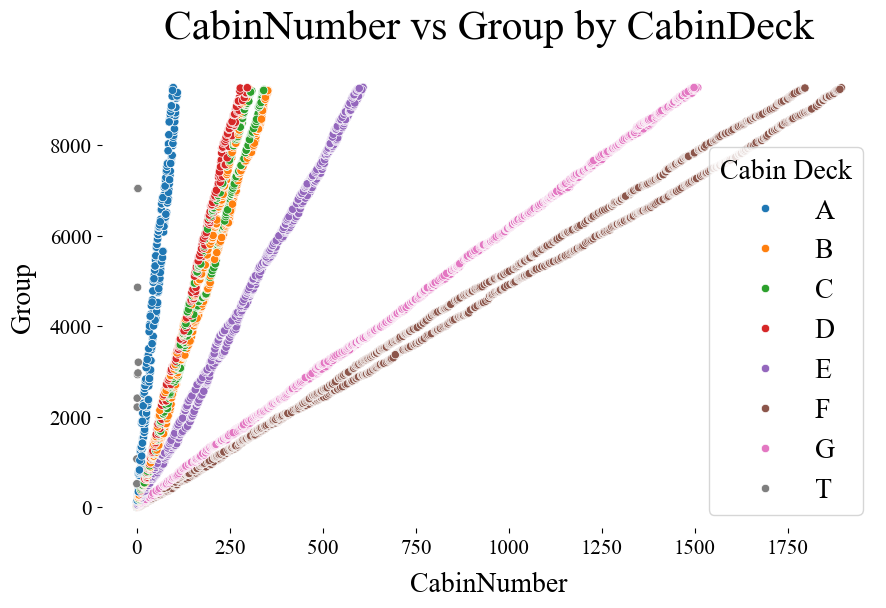

In [76]:
# Filter the DataFrame to exclude rows where CabinNumber is NaN
filtered_train = data[~data['CabinNumber'].isna()]

# Encode the CabinDeck column
encoder = LabelEncoder()
encoded_cabin_deck = encoder.fit_transform(filtered_train['CabinDeck'])

# Create a mapping from encoded values to actual labels
label_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

# Create the scatter plot with `hue`

plt.rcParams.update(params)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=filtered_train['CabinNumber'], y=filtered_train['Group'], hue=encoded_cabin_deck, palette='tab10')

# Update the legend to show actual CabinDeck labels
handles, labels = scatter.get_legend_handles_labels()

# Convert labels from encoded values to actual labels
new_labels = [label_mapping[int(label)] for label in labels]
scatter.legend(handles, new_labels, title='Cabin Deck')

plt.title('CabinNumber vs Group by CabinDeck')
plt.show()


In [77]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CryoSleep,310,2.39
VIP,296,2.28


In [78]:
# Impute missing Cabin Numbers based on mode within groups
data['CabinNumber'] = data.groupby(['Group'])['CabinNumber'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [79]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CryoSleep,310,2.39
VIP,296,2.28


### **Insights**

>  **1. Starting Missing Values:** Starting with 299 missing values.</BR>
>  **2. Linear Relationship:** The CabinNumber and Group share a linear relationship on a deck by deck basis.  </BR>
>  **3. Linear Regrerssion:** Extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number. End with 0 missing values.

## **CryoSleep**

In [80]:
pd.set_option('future.no_silent_downcasting', True)

In [81]:
data['CryoSleep'] = data['CryoSleep'].fillna(False).astype(bool)


In [82]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
VIP,296,2.28


### **Insights**

>  **1. Starting Missing Values:** Starting with 310 missing values.</BR>
>  **2. CryoSleep == False:** Imputed Missing values with False since most passengers were False. </BR>
>  **3. End Missing Values:** End with 0 missing values.

## **VIP**

Imputed Missing values with False since most passengers were False. 

In [83]:
data['VIP'] = data['VIP'].fillna(False).astype(bool)


In [84]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing


### **Insights**

>  **1. Starting Missing Values:** Starting with 3296 missing values.</BR>
>  **2. VIP == False:** Imputed Missing values with False since most passengers were False. </BR>
>  **3. End Missing Values:** End with 0 missing values.

## **Save Dataset**

In [86]:
data.to_csv(r"C:\Users\Dell\Documents\AI\Titanic\Data\data.csv", index=False)